In [3]:
import os
import numpy as np
import mne
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from copy import deepcopy
from mne.preprocessing import create_ecg_epochs, create_eog_epochs, read_ica
import sys
from langouEEG import *
import pickle
from mne.viz import plot_topomap

init_prog()
for i in range(1,2):
    subject_name = i
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    raw = initLayout(raw)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,picks, 
    tmin_rest = 60,tmax_rest = 120,tmin_flick = 3,tmax_flick = 30)
    epochs = epoch_RR,epoch_RF,epoch_4R,epoch_4F

    
    power_all_R, power_target_R, power_all_F, power_target_F = get_allch_abs_power(epoch_4R, epoch_4F, f_bottom = .1, f_low = 39.0, f_high = 41.0, f_top = 100.0, sfreq=500.0)
    rel_power_R, leng_R = cal_rel_power_R(power_target_R, power_all_R)
    rel_power_F, leng_F = cal_rel_power_F(power_target_F, power_all_F)

    power_all_R, power_target_R, power_all_F, power_target_F = get_allch_abs_power(epoch_RR, epoch_RF, f_bottom = .1, f_low = 39.0, f_high = 41.0, f_top = 100.0, sfreq=500.0)
    rel_power_F_ran, leng_F = cal_rel_power_F_ran(power_target_F, power_all_F)
    # save_rel_powers()



Used Annotations descriptions: ['11', '12', '8', '9']
{'11': 1, '12': 2, '8': 3, '9': 4}
Used Annotations descriptions: ['11', '12', '8', '9']
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 3 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 3 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 3 events and 30001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching 

(64,)
(64,)
(64,)
(64,)
(64,)
64


Text(0.5, 1.0, 'Percent power')

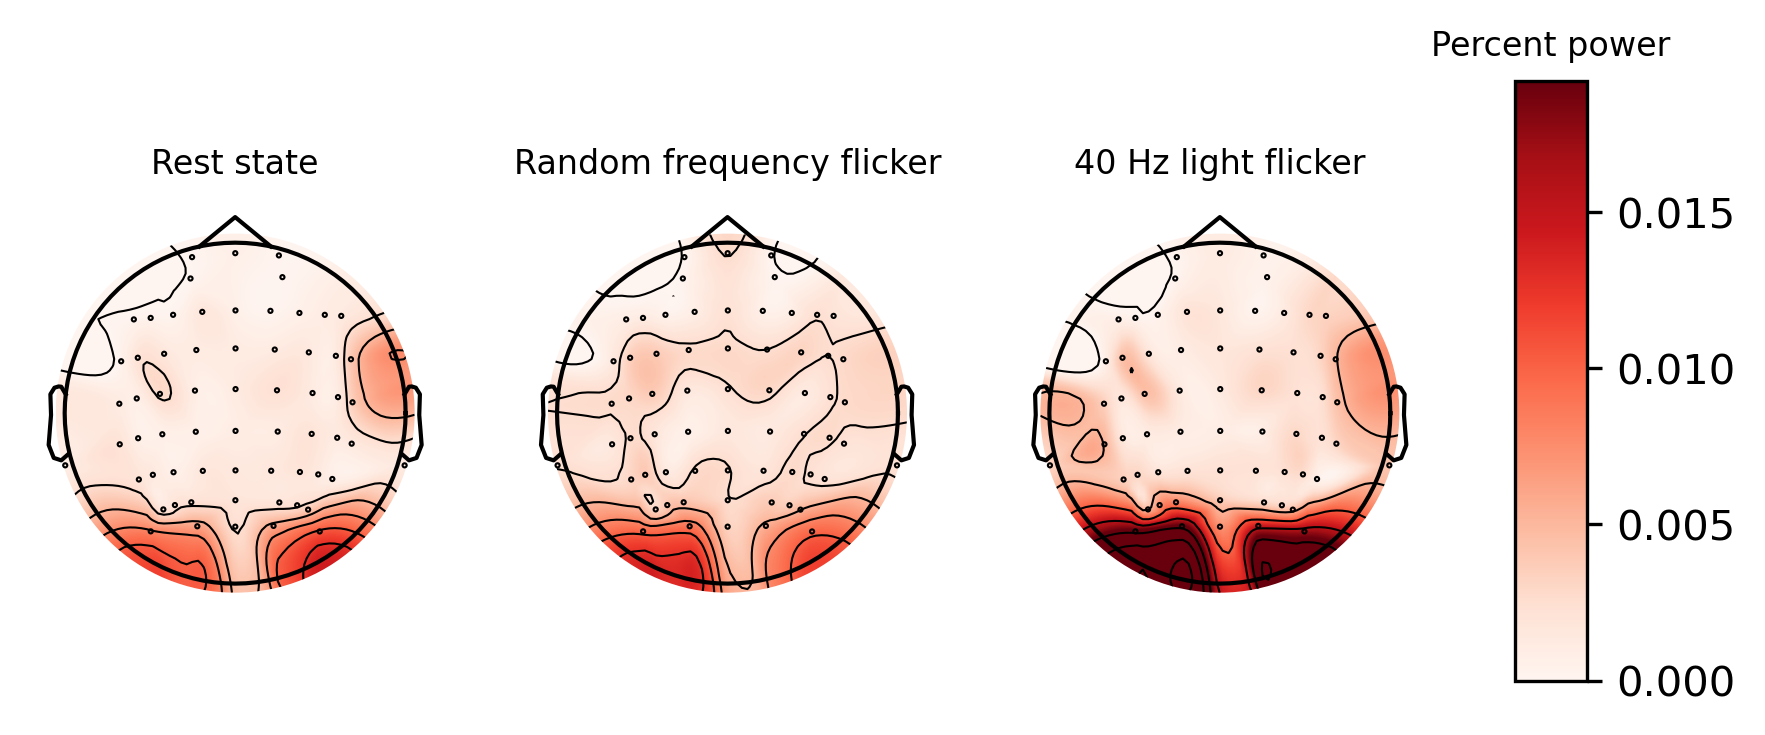

In [8]:
print(np.shape(power_all_R))
print(np.shape(power_target_R))
print(np.shape(power_all_F))
print(np.shape(power_target_F))
print(np.shape(rel_power_R))
print(leng_R)
fig, axis = plt.subplots(1, 3, dpi=300)

im,cm = plot_topomap(rel_power_R, epoch_4F.info,vmax=np.max(rel_power_F), axes=axis[0], show=False)
axis[0].set_title('Rest state',fontsize=8)
im,cm = plot_topomap(rel_power_F_ran, epoch_4F.info,vmax=np.max(rel_power_F), axes=axis[1], show=False)
axis[1].set_title('Random frequency flicker',fontsize=8)
im,cm = plot_topomap(rel_power_F, epoch_4F.info,vmax=np.max(rel_power_F), axes=axis[2], show=False)
axis[2].set_title('40 Hz light flicker',fontsize=8)
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.3
ax_y_height = 0.5
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('Percent power',fontsize=8) # title on top of colorbar